In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from balanced_topo import balanced_tree_with_fixed_leaves
from pathlib import Path

sns.set_style(
    "ticks",
    rc={"axes.grid": True},
)

In [3]:
data_dir = Path("out/2024-03-28__01:30:50")
data_dir

PosixPath('out/2024-03-28__01:30:50')

In [4]:
files = list(data_dir.glob("*.feather"))
files

[PosixPath('out/2024-03-28__01:30:50/height=2__workers=256.feather'),
 PosixPath('out/2024-03-28__01:30:50/height=8__workers=256.feather'),
 PosixPath('out/2024-03-28__01:30:50/height=4__workers=256.feather'),
 PosixPath('out/2024-03-28__01:30:50/height=1__workers=256.feather')]

In [5]:
df = pd.concat([pd.read_feather(f) for f in files])
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,test/acc,test/loss,train/rel_time,strategy,height,workers
0,0.03125,2.298315,0,0,2024-03-28 01:51:57.965042,162,worker,10,aggregator,0,0.1,2.305933,3.592713,fedavg,2,256
1,0.21875,2.294145,0,1,2024-03-28 01:51:57.996296,162,worker,10,aggregator,0,0.1,2.305933,3.623967,fedavg,2,256
2,0.18750,2.289414,0,2,2024-03-28 01:51:58.026428,162,worker,10,aggregator,0,0.1,2.305933,3.654099,fedavg,2,256
3,0.00000,2.361361,0,3,2024-03-28 01:51:58.034166,162,worker,10,aggregator,0,0.1,2.305933,3.661837,fedavg,2,256
4,0.21875,2.289307,1,0,2024-03-28 01:51:58.066558,162,worker,10,aggregator,0,0.1,2.305933,3.694229,fedavg,2,256


In [6]:
# sns.relplot(
#     df,
#     kind="line",
#     col="height", col_wrap=2,
#     x="round",
#     y="train/loss",
#     hue="strategy",
#     errorbar=None,
# )
# plt.show()

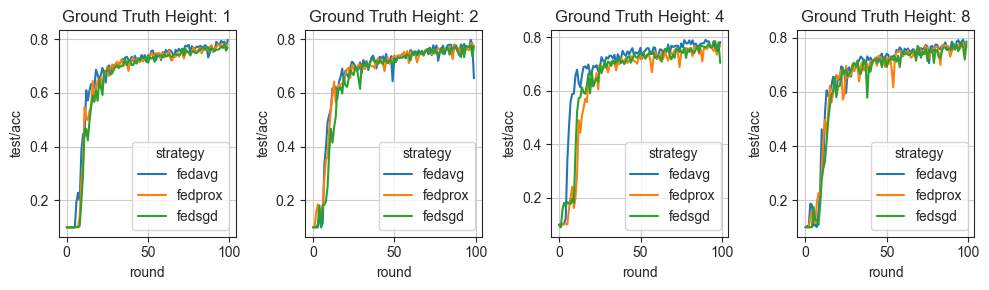

In [12]:
def make_plot(df, height, ax):
    tmp = df.query(f"height == {height}")
    sns.lineplot(
        tmp,
        x="round",
        y="test/acc",
        hue="strategy",
        errorbar=None,
        ax=ax,
    )


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for i, h in enumerate([1, 2, 4, 8]):
    make_plot(df, h, axes[i])
    axes[i].set_title(f"Ground Truth Height: {h}")

plt.tight_layout()
plt.savefig("acc_hierarchies.pdf", bbox_inches="tight")
plt.show()

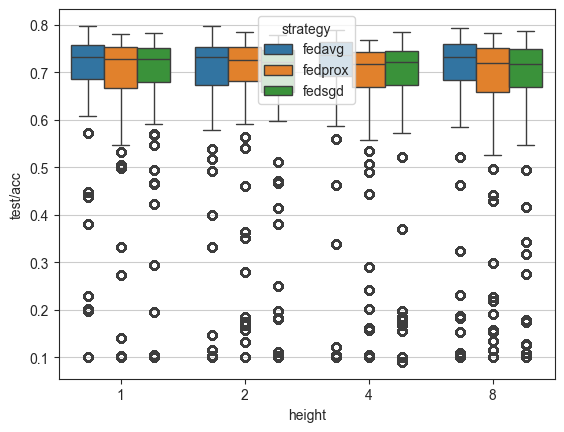

In [8]:
sns.boxplot(
    df,
    x="height",
    y="test/acc",
    hue="strategy",
)
plt.show()

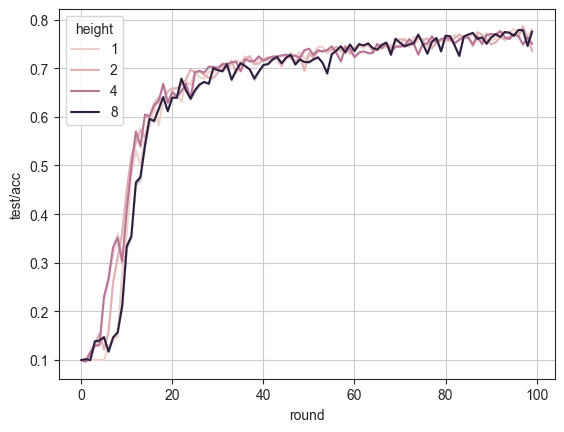

In [9]:
sns.lineplot(
    df,
    x="round",
    y="test/acc",
    hue="height",
)
plt.show()